# Solution to problem 1
   

### Solution to problem 2

In [23]:
import Pkg
Pkg.add("Distributions")
Pkg.add("Statistics")
Pkg.add("Plots")
Pkg.add("SpecialFunctions")
Pkg.add("StatsPlots")
Pkg.add("StatsBase")
Pkg.add("Random")
using Distributions
using Statistics
using Plots
using SpecialFunctions
using StatsPlots
using StatsBase
using Random

    Updating registry at `C:\Users\Anoushka 30\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Anoushka 30\.julia\environments\v

In [24]:
Random.seed!(1)

TaskLocalRNG()

In [25]:
k=10
u = Gamma(10, 0.01)

Gamma{Float64}(α=10.0, θ=0.01)

In [27]:
#Implementing Portkey- Barker algorithm

function portkey(x,y,cx,cy,beta)
    
    while true
        
    
        S= rand(Bernoulli(beta))
        if S==0
            return 0
        else
            C1= rand(Bernoulli(cy/(cy+cx)))
            if C1==1
                lambda = rand(u)
                py = pdf(Weibull(k,lambda),y)/cy
                C2 = rand(Bernoulli(py))
                if C2==1
                    return 1
                else 
                    continue

                end

            else
                lambda= rand(u)
                px= pdf(Weibull(k,lambda),x)/cx
                C2 = rand(Bernoulli(px))
                if C2==1
                    return 0
                else 
                    continue
                end
            end
        end
#         count= count-1
    end   

end

portkey (generic function with 1 method)

In [28]:
function Barker(n,beta)
    arr = ones(n,1)
    arr[1] = 0.1
    accept = 0
    for i in 2:n
        y = rand(Normal(arr[i-1],sqrt(0.001)))
        if y<0
            arr[i] = arr[i-1]
            continue
        end
        cx = k/(exp(1)*arr[i-1])
        cy = k/(exp(1)*y)
        
        X = portkey(arr[i-1],y,cx, cy, beta)
        
        if X == 0
            arr[i] = arr[i-1]
        else
            arr[i] = y
            accept=accept+1
        end
        
    end
    
    return arr, accept
end

Barker (generic function with 1 method)

In [37]:
betas = [1, 0.99, 0.90, 0.75]

trace_plots=[]
autocor_plots = []
n = 1000
for beta in betas
    arr, accept = Barker(n, beta)
    println("Acceptance ratio for beta = ",beta,"comes out to be ",accept*100/(n*1.0))
    trace_plot = plot(arr, title=beta)
    autocor_plot = plot(autocor(arr), title=beta)
    push!(trace_plots,trace_plot)
    push!(autocor_plots, autocor_plot)
end

Acceptance ratio for beta =1.0comes out to be 40.8
Acceptance ratio for beta =0.99comes out to be 39.4
Acceptance ratio for beta =0.99comes out to be 39.3
Acceptance ratio for beta =0.75comes out to be 14.9


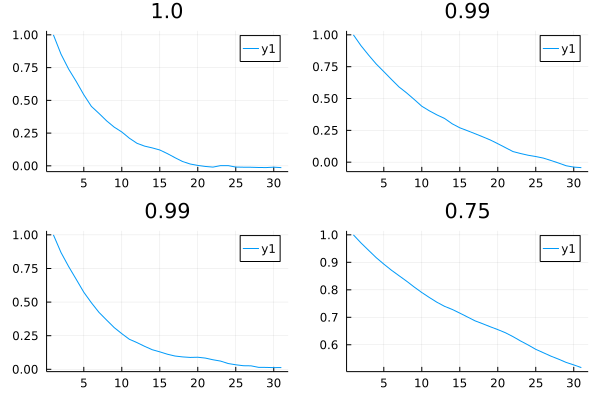

In [38]:
plot(autocor_plots...)

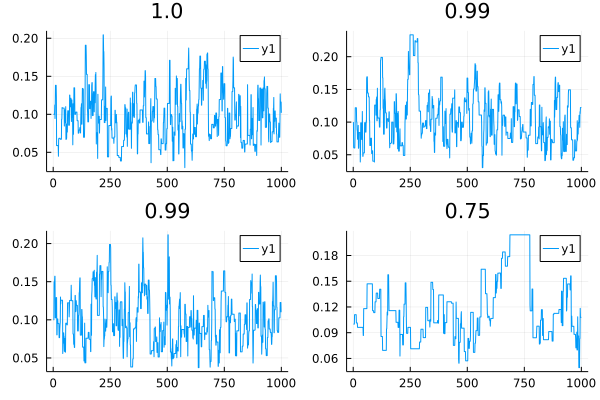

In [39]:
plot(trace_plots...)

# Conclusion
From above plots,it can be concluded that with decrease in  value acceptance probability decreases, morever the autocorrelation plot doesn't seems to change drastically.